# K Nearest Neighbor Classifier

## Problem Statement

Given the details of cars, we hav to classify the origin of the cars

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from io import StringIO
from matplotlib.colors import ListedColormap
%matplotlib inline

## Dataset

This dataset is a slightly modified version of the dataset provided in the StatLib library. In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for the "mpg" attribute. The original dataset is available in the file "auto-mpg.data-original".

"The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes."
Attribute Information:

- __mpg__: continuous
- __cylinders__: multi-valued discrete
- __displacement__: continuous
- __horsepower__: continuous
- __weight__: continuous
- __acceleration__: continuous
- __model year__: multi-valued discrete
- __origin__: multi-valued discrete
- __car name__: string (unique for each instance)

## Data Analysis

In [4]:
auto_data = pd.read_csv("auto-mpg.csv")

* ### Checking Data

In [5]:
auto_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [6]:
auto_data.shape # Number of rows and columns

(398, 9)

In [7]:
auto_data.describe(include='O')

,car name
count,398
unique,305
top,ford pinto
freq,6


We can see how many unique values and frequency of majority values in each categorical column are present


In [8]:
auto_data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


We can check standard deviation, mean and other values of all continuous columns present in the dataset

* ### Checking DataType

In [10]:
auto_data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [11]:
# Testing for null values
auto_data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

Dataset has 6 null values in horsepower column

In [13]:
auto_data.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

Dataset has no NA values

* ### Treating Null Values

In [14]:
auto_data.horsepower = auto_data.horsepower.fillna(auto_data.horsepower.mean())

In [15]:
auto_data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

No null values in the data now

* ### Predictor and Data

In [16]:
print(*auto_data.columns, sep=' | ')

mpg | cylinders | displacement | horsepower | weight | acceleration | model year | origin | car name


Dropping car name as it is not useful in predicting the origin

In [17]:
feat = auto_data.columns
feat = feat.drop(['car name', 'origin'])

In [18]:
X = auto_data[feat]
y = auto_data.origin

In [19]:
X.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


In [20]:
print(X.shape, y.shape)

(398, 7) (398,)


* ### Scaling the data

C:\Users\karan\AppData\Local\Temp\ipykernel_20560\514184484.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(X, labels=feat)


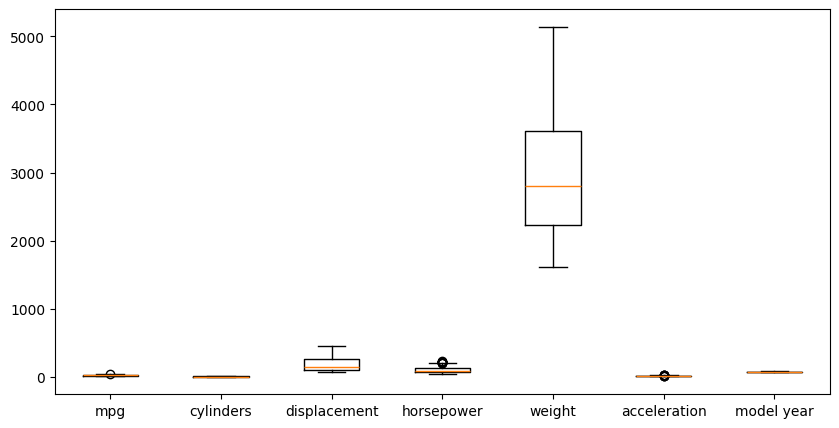

In [21]:
plt.figure(figsize=(10,5))
plt.boxplot(X, labels=feat)
plt.show()

The data is highly imbalanced. Using MinMaxScaler to scale the data

In [22]:
scl = MinMaxScaler()
X = scl.fit_transform(X)

C:\Users\karan\AppData\Local\Temp\ipykernel_20560\2054062702.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(X, labels=feat)


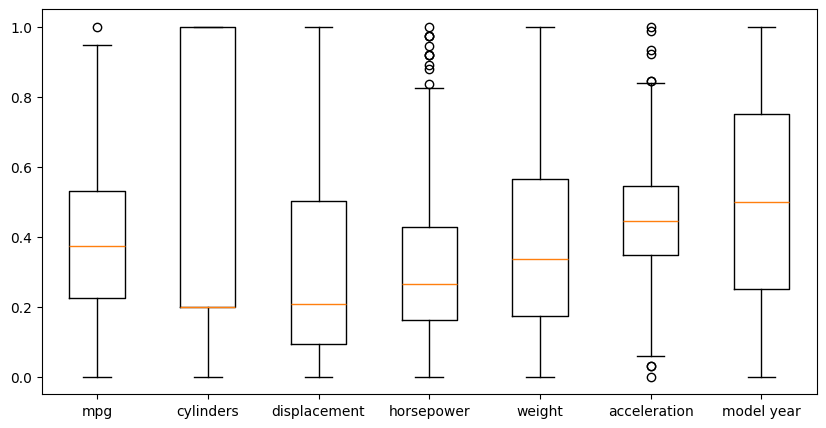

In [23]:
plt.figure(figsize=(10, 5))
plt.boxplot(X, labels=feat)
plt.show()

* ### Checking distribution of Target Variable

In [25]:
Target_ratio = y.value_counts()/len(y)
print(Target_ratio)

origin
1    0.625628
3    0.198492
2    0.175879
Name: count, dtype: float64


* ### Checking for data unbalance

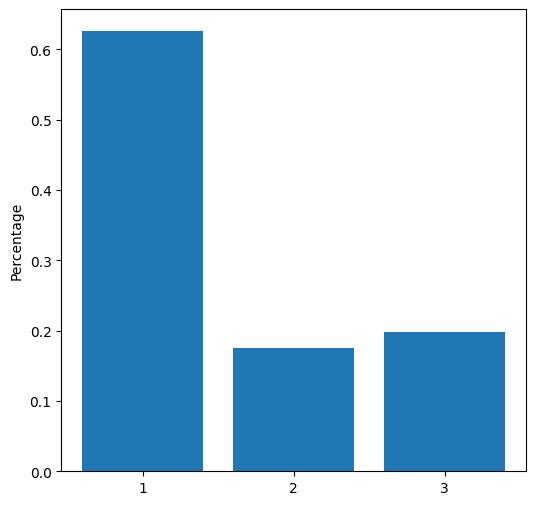

In [27]:
plt.figure(figsize=(6,6))
plt.bar(Target_ratio.index, Target_ratio)
plt.ylabel('Percentage')
plt.xticks(Target_ratio.index)
plt.show()

Dataset has around 62% of entries for origin 1

* ### Train Test Split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

## K Nearest Neighbor

Key hyperparameters to be considered before applying the KNN algorithm:

- __n_neighbors__: Integer value to determine the number of neighbors to use by default it is __5__.

In [29]:
knn6 = KNeighborsClassifier(n_neighbors=6)
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train, y_train)
knn6.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

## Accuracy Score

* ### KNN with 6 Neighbors

In [30]:
pred = knn6.predict(X_test)
acc6 = accuracy_score(y_test, pred)
print('Accuracy Score:', acc6)

Accuracy Score: 0.75


* ### KNN with 3 Neighbors

In [31]:
pred = knn3.predict(X_test)
acc3 = accuracy_score(y_test, pred)
print("Accuracy Score:", acc3)

Accuracy Score: 0.7


Slightly better model with 6 neighbors

## Multilass ROC Curve

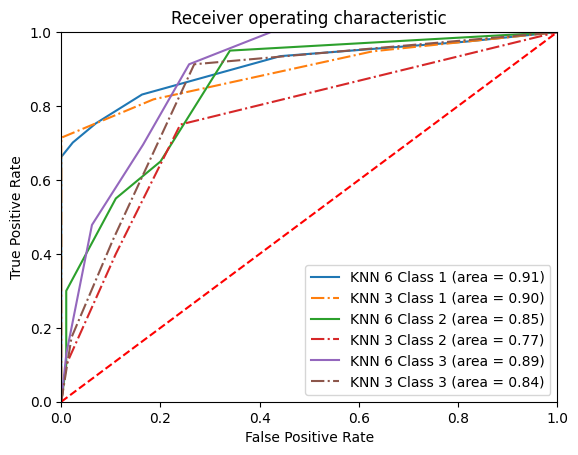

In [32]:
knn6_prob=knn6.predict_proba(X_test).T
knn3_prob=knn3.predict_proba(X_test).T

dummy_y_test=pd.get_dummies(y_test)

knn6_roc_auc=dict()
knn3_roc_auc=dict()
lfpr6=dict()
ltpr6=dict()
lfpr3=dict()
ltpr3=dict()
lthresholds6=dict()
lthresholds3=dict()
for i in dummy_y_test.columns:
    knn6_roc_auc[i]=roc_auc_score(dummy_y_test[i],knn6_prob[i-1])
    knn3_roc_auc[i]=roc_auc_score(dummy_y_test[i],knn3_prob[i-1])
    lfpr6[i], ltpr6[i], lthresholds6[i] = roc_curve(dummy_y_test[i], knn6_prob[i-1])
    lfpr3[i], ltpr3[i], lthresholds3[i] = roc_curve(dummy_y_test[i], knn3_prob[i-1])


for i in dummy_y_test.columns:
    plt.plot(lfpr6[i], ltpr6[i], label='KNN 6 Class '+str(i)+ ' (area = %0.2f)' % knn6_roc_auc[i])
    plt.plot(lfpr3[i], ltpr3[i],'-.', label='KNN 3 Class '+str(i)+ ' (area = %0.2f)' % knn3_roc_auc[i])



plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

KNN 6 Class 1 has highest AUC value